In [96]:
import pandas as pd
import numpy as np

df = pd.read_stata("C:\\Users\\matthew.hudson\\Desktop\\vs\\savills-db-etl-atlas-dwh\\master\\Leeds.dta")

rename_dict = {
    "priceper": "price_per_m2",
    "year": "sale_year",
    "dateoftransfer": "sale_date",
    "propertytype": "property_type",
    "duration": "tenure_type",
    "price": "sale_price",
    "postcode": "postcode",
    "lad21cd": "local_authority_code",
    "transactionid": "transaction_id",
    "id": "epc_id",
    "tfarea": "total_floor_area_m2",
    "numberrooms": "number_of_rooms",
    "classt": "address_match_class",
    "CURRENT_ENERGY_EFFICIENCY": "current_energy_efficiency",
    "POTENTIAL_ENERGY_EFFICIENCY": "potential_energy_efficiency",
    "CONSTRUCTION_AGE_BAND": "construction_age_band",
    
}

df.rename(columns=rename_dict, inplace=True)

columns_to_drop = [
    "transaction_id",
    "epc_id",
    "address_match_class",
    "sale_price"
]

df = df.drop(columns=columns_to_drop)

df["sale_year"] = pd.to_datetime(df["sale_year"].astype(str) + "-01-01")

# Ensure construction_age_band is a string
df["construction_age_band"] = df["construction_age_band"].astype(str)

# Display the remaining columns
df["construction_age_band"] = df["construction_age_band"].replace({"INVALID!": "", "NO DATA!": "", "": ""})
df["potential_energy_efficiency"] = df["potential_energy_efficiency"].replace({"NA": "", "": ""})

df["construction_age_band"] = df["construction_age_band"].apply(lambda x: x if "England and Wales:" in x else None)

df["number_of_rooms"] = df["number_of_rooms"].replace("NA", np.nan)

# Drop rows where number_of_rooms is NaN
df = df.dropna(subset=["number_of_rooms"])
df = df.dropna()

# df.head(100).to_excel("df.xlsx", index=False)
df

,price_per_m2,sale_year,sale_date,property_type,tenure_type,postcode,local_authority_code,total_floor_area_m2,number_of_rooms,current_energy_efficiency,potential_energy_efficiency,construction_age_band
0,1954.54545454545,2019-01-01,2019-08-22,T,F,LS27 0JT,E08000035,220.000000,8,59,78,England and Wales: before 1900
1,1920,2020-01-01,2020-01-31,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975
2,384,1997-01-01,1997-09-18,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975
3,2546.17641981702,2009-01-01,2009-05-20,S,F,LS17 7LF,E08000035,57.930000,3,61,75,England and Wales: 1950-1966
4,2403.75,2014-01-01,2014-02-14,T,F,LS20 8QE,E08000035,52.000000,3,76,94,England and Wales: 1983-1990
...,...,...,...,...,...,...,...,...,...,...,...,...
294576,1746.36174636175,2009-01-01,2009-08-28,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975
294577,3201.6632016632,2022-01-01,2022-11-21,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975
294579,754.511981650269,2002-01-01,2002-01-18,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900
294580,700.187118971449,1999-01-01,1999-11-01,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900


In [97]:
df["number_of_rooms"].unique()

array(['8', '6', '3', '5', '7', '4', '9', '2', '11', '10', '1', '14',
       '13', '12', '60', '16', '15', '18', '22', '20', '24', '19', '23',
       '52', '0', '33', '46', '17'], dtype=object)

#### EDA

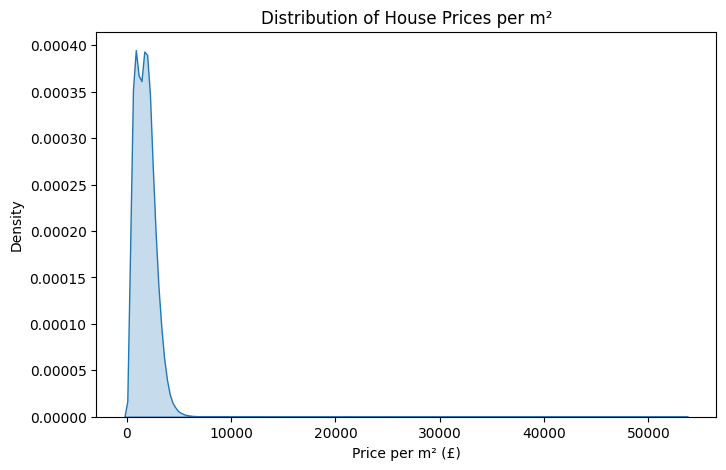

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure price_per_m2 is numeric
df["price_per_m2"] = pd.to_numeric(df["price_per_m2"], errors="coerce")

# Plot Price per m² Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df["price_per_m2"].dropna(), fill=True)
plt.xlabel("Price per m² (£)")
plt.ylabel("Density")
plt.title("Distribution of House Prices per m²")
plt.show()


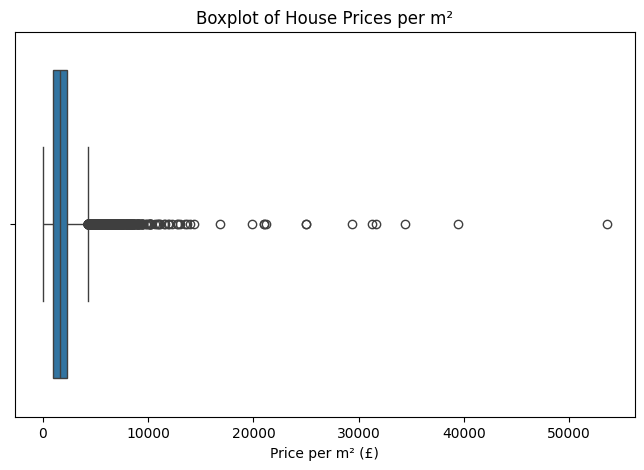

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price_per_m2"])
plt.xlabel("Price per m² (£)")
plt.title("Boxplot of House Prices per m²")
plt.show()


In [100]:
Q1 = df["price_per_m2"].quantile(0.25)  # 25th percentile
Q3 = df["price_per_m2"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

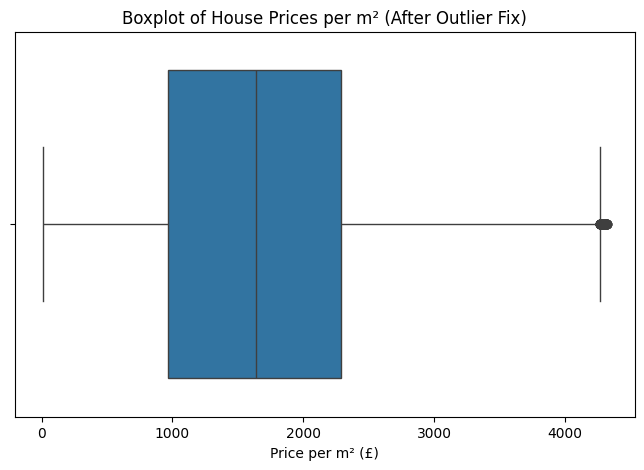

In [101]:
df = df[(df["price_per_m2"] >= lower_bound) & (df["price_per_m2"] <= upper_bound)]
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price_per_m2"])
plt.xlabel("Price per m² (£)")
plt.title("Boxplot of House Prices per m² (After Outlier Fix)")
plt.show()


In [102]:
df

,price_per_m2,sale_year,sale_date,property_type,tenure_type,postcode,local_authority_code,total_floor_area_m2,number_of_rooms,current_energy_efficiency,potential_energy_efficiency,construction_age_band
0,1954.545455,2019-01-01,2019-08-22,T,F,LS27 0JT,E08000035,220.000000,8,59,78,England and Wales: before 1900
1,1920.000000,2020-01-01,2020-01-31,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975
2,384.000000,1997-01-01,1997-09-18,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975
3,2546.176420,2009-01-01,2009-05-20,S,F,LS17 7LF,E08000035,57.930000,3,61,75,England and Wales: 1950-1966
4,2403.750000,2014-01-01,2014-02-14,T,F,LS20 8QE,E08000035,52.000000,3,76,94,England and Wales: 1983-1990
...,...,...,...,...,...,...,...,...,...,...,...,...
294576,1746.361746,2009-01-01,2009-08-28,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975
294577,3201.663202,2022-01-01,2022-11-21,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975
294579,754.511982,2002-01-01,2002-01-18,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900
294580,700.187119,1999-01-01,1999-11-01,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900


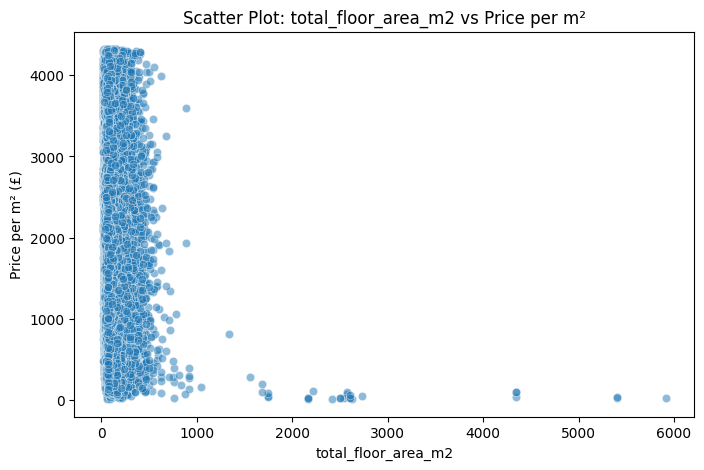

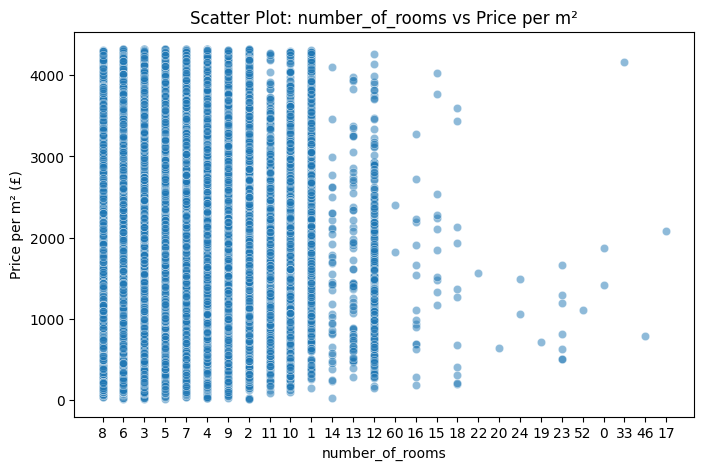

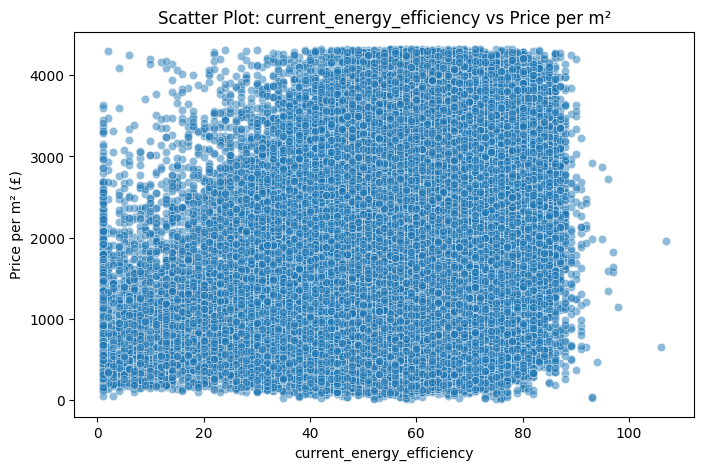

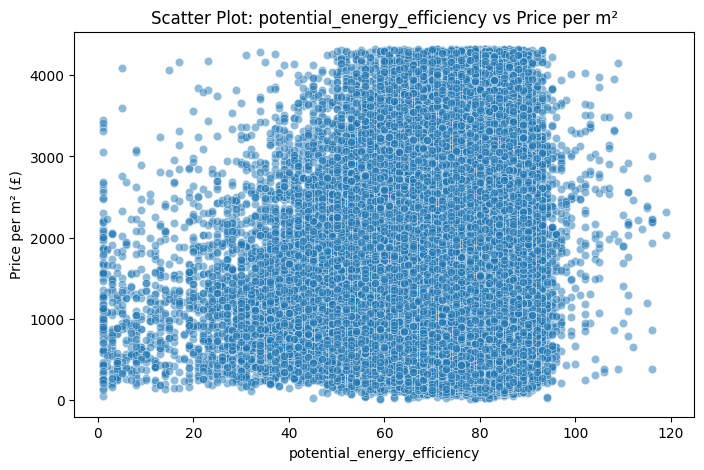

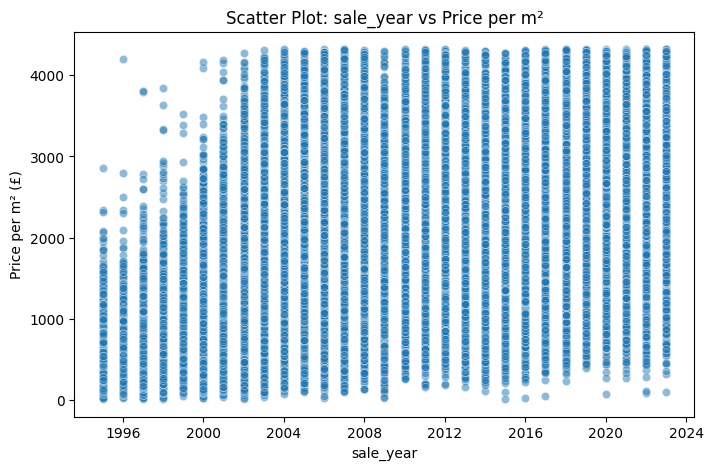

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ["total_floor_area_m2", "number_of_rooms", "current_energy_efficiency", "potential_energy_efficiency", "sale_year"]

for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[var], y=df["price_per_m2"], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel("Price per m² (£)")
    plt.title(f"Scatter Plot: {var} vs Price per m²")
    plt.show()


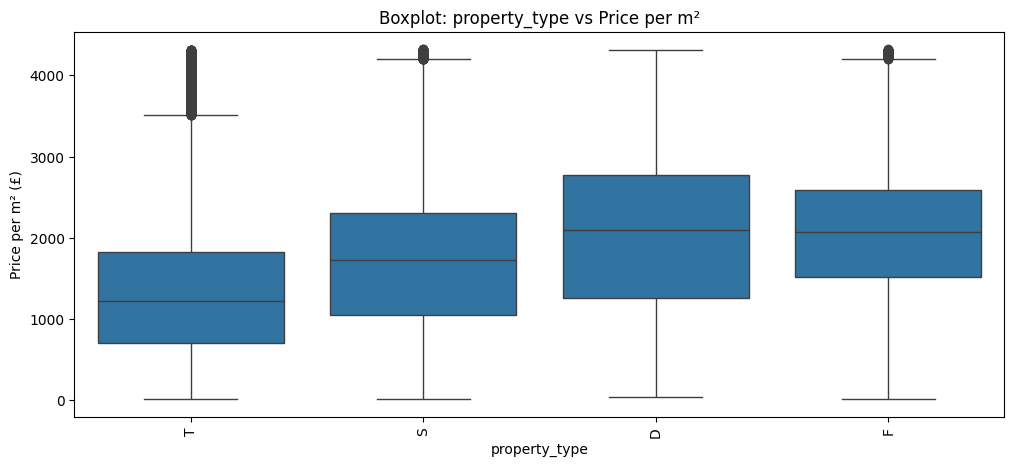

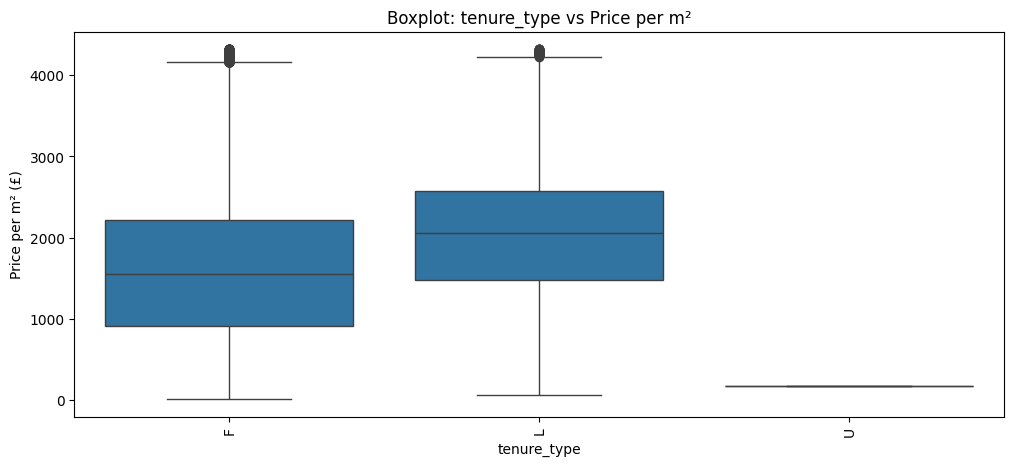

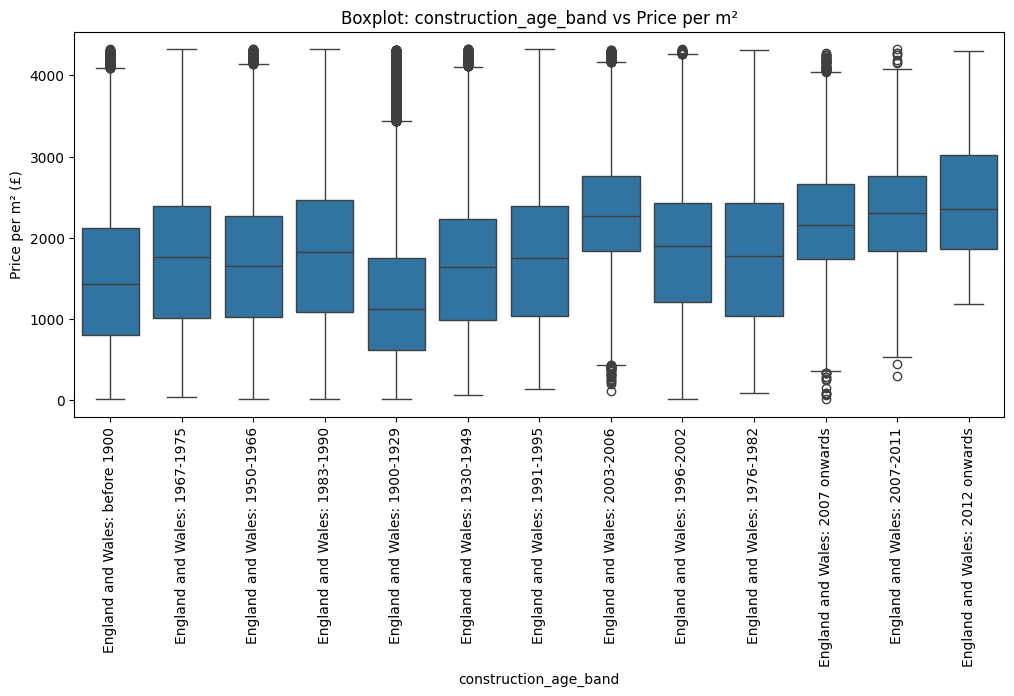

In [84]:
categorical_vars = ["property_type", "tenure_type", "construction_age_band"]

for var in categorical_vars:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[var], y=df["price_per_m2"])
    plt.xticks(rotation=90)
    plt.xlabel(var)
    plt.ylabel("Price per m² (£)")
    plt.title(f"Boxplot: {var} vs Price per m²")
    plt.show()


C:\Users\matthew.hudson\AppData\Local\Temp\ipykernel_20552\2009614229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["construction_age_group"] = df["construction_age_band"].map(age_band_mapping)


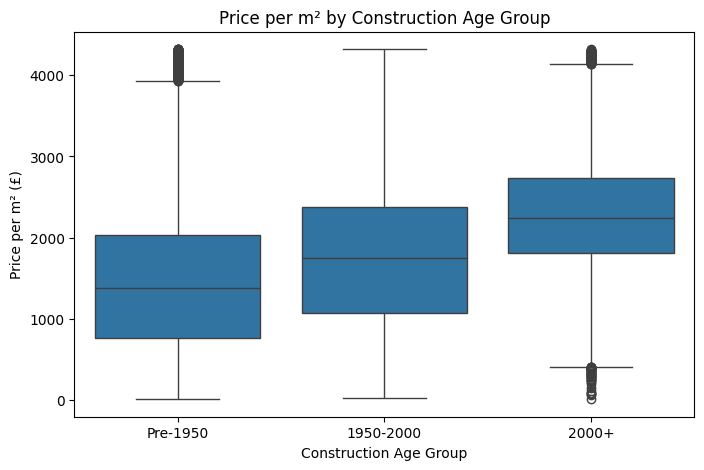

In [104]:
# Grouping construction age bands into broader categories
age_band_mapping = {
    "England and Wales: before 1900": "Pre-1950",
    "England and Wales: 1900-1929": "Pre-1950",
    "England and Wales: 1930-1949": "Pre-1950",
    "England and Wales: 1950-1966": "1950-2000",
    "England and Wales: 1967-1975": "1950-2000",
    "England and Wales: 1976-1982": "1950-2000",
    "England and Wales: 1983-1990": "1950-2000",
    "England and Wales: 1991-1995": "1950-2000",
    "England and Wales: 1996-2002": "1950-2000",
    "England and Wales: 2003-2006": "2000+",
    "England and Wales: 2007-2011": "2000+",
    "England and Wales: 2007 onwards": "2000+",
    "England and Wales: 2012 onwards": "2000+"
}

# Apply mapping to create new grouped column
df["construction_age_group"] = df["construction_age_band"].map(age_band_mapping)

# Boxplot for new age categories vs price per m²
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["construction_age_group"], y=df["price_per_m2"], order=["Pre-1950", "1950-2000", "2000+"])
plt.xlabel("Construction Age Group")
plt.ylabel("Price per m² (£)")
plt.title("Price per m² by Construction Age Group")
plt.show()


In [105]:
df

,price_per_m2,sale_year,sale_date,property_type,tenure_type,postcode,local_authority_code,total_floor_area_m2,number_of_rooms,current_energy_efficiency,potential_energy_efficiency,construction_age_band,construction_age_group
0,1954.545455,2019-01-01,2019-08-22,T,F,LS27 0JT,E08000035,220.000000,8,59,78,England and Wales: before 1900,Pre-1950
1,1920.000000,2020-01-01,2020-01-31,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975,1950-2000
2,384.000000,1997-01-01,1997-09-18,S,F,LS12 5QP,E08000035,125.000000,6,56,79,England and Wales: 1967-1975,1950-2000
3,2546.176420,2009-01-01,2009-05-20,S,F,LS17 7LF,E08000035,57.930000,3,61,75,England and Wales: 1950-1966,1950-2000
4,2403.750000,2014-01-01,2014-02-14,T,F,LS20 8QE,E08000035,52.000000,3,76,94,England and Wales: 1983-1990,1950-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294576,1746.361746,2009-01-01,2009-08-28,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975,1950-2000
294577,3201.663202,2022-01-01,2022-11-21,D,F,LS28 5TR,E08000035,120.250000,5,56,69,England and Wales: 1967-1975,1950-2000
294579,754.511982,2002-01-01,2002-01-18,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900,Pre-1950
294580,700.187119,1999-01-01,1999-11-01,T,F,LS6 1BJ,E08000035,165.669998,7,42,55,England and Wales: before 1900,Pre-1950
